In [15]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [16]:
# load the dataset to create a pandas dataframe and view the shape of the dataframe
df = pd.read_csv('test.csv')
df.shape

(1459, 80)

In [17]:
# view the first five records of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

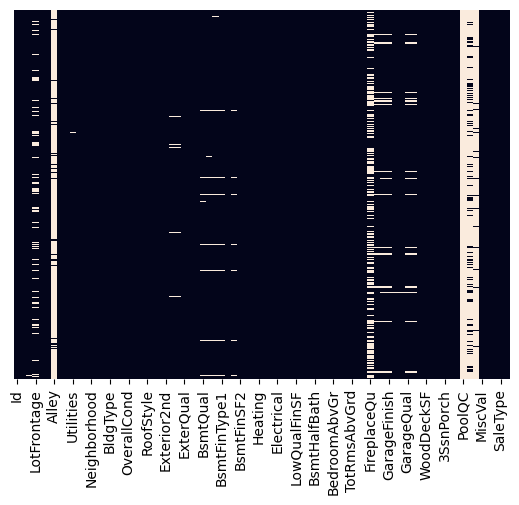

In [18]:
# visualize the null values using heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [19]:
# create a list called null which contains columns with more than 50% of null value (the list is obtained using the other 
# notebook where we handled the training dataset) and drop these columns from the test dataframe

null = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns = null + ['Id'], inplace = True, axis = 1)

In [20]:
# create a function to fill the missing values in both the numerical variables and categorical variables

def fill_missing_values(df, features, method='mean'):
     for feature in features:
        if method == 'mean':
            fill_value = df[feature].mean()
        elif method == 'mode':
            fill_value = df[feature].mode().iloc[0]
        
        df[feature].fillna(value=fill_value, inplace=True)
        
     return df

In [21]:
# create a list of numerical variables
numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# view the number of missing values in each numerical variable
for feature in numeric_features:
    num_null = df[feature].isnull().sum()
    if num_null > 0:
        print(f"The feature '{feature}' has {num_null} missing values.")

The feature 'LotFrontage' has 227 missing values.
The feature 'MasVnrArea' has 15 missing values.
The feature 'BsmtFinSF1' has 1 missing values.
The feature 'BsmtFinSF2' has 1 missing values.
The feature 'BsmtUnfSF' has 1 missing values.
The feature 'TotalBsmtSF' has 1 missing values.
The feature 'BsmtFullBath' has 2 missing values.
The feature 'BsmtHalfBath' has 2 missing values.
The feature 'GarageYrBlt' has 78 missing values.
The feature 'GarageCars' has 1 missing values.
The feature 'GarageArea' has 1 missing values.


In [22]:
# create a list of numerical variables

numeric_cols = ['LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']

In [23]:
# impute the missing values in the numerical variables with the mean (only the numerical columns for which it makes sense
# to fill the missing values with mean)
fill_missing_values(df, numeric_cols);

In [24]:
# create a list of categorical variables
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

# impute the missing values with mode for the categorical variables and few numerical variables with mode using the 
# above defined function
fill_missing_values(df, categorical_features + ['MasVnrArea', 'GarageYrBlt', 'BsmtFullBath', 
                                                'BsmtHalfBath','GarageYrBlt'],  method = 'mode');

<AxesSubplot:>

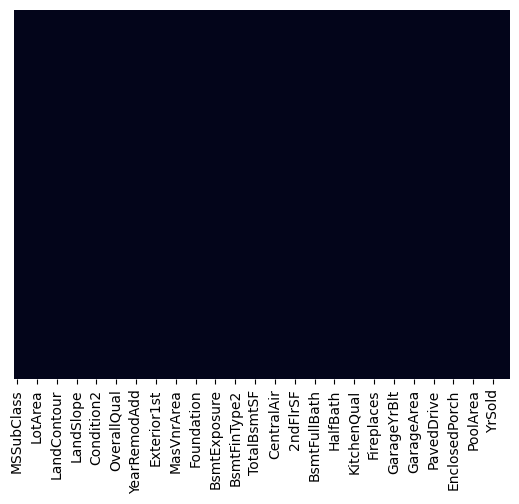

In [25]:
# let's see if there are null values remaining in any columns using a heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [26]:
# viewing the number of unique values in each categorical variables as there may be difference in the number of unique
# values for the dataset used for training and the dataset used for testing. this may create problem if we one hot encode
# the train and test dataset seperately

for feature in categorical_features:
    print(feature, df[feature].nunique())

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 1
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
RoofStyle 6
RoofMatl 4
Exterior1st 13
Exterior2nd 15
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 4
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


In [27]:
len(categorical_features)

39

In [28]:
df.shape

(1459, 75)

In [29]:
# create a csv file of the dataframe for test dataset for furthur analysis. this csv file is used in the training notebook
df.to_csv('formulatedtest.csv', index = False)